<a href="https://colab.research.google.com/github/iranamira/metnum_Pertemuan-13_Namira-Nurfaliani/blob/main/metnum_pertemuan13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Namira Nurfaliani-21120122140135

Metode Integrasi Simpsons 1/3

N = 10:
  Approximate pi = 3.141592613939215
  RMS Error = 3.9650577932093256e-08
  Execution Time = 0.0003085136413574219 seconds

N = 100:
  Approximate pi = 3.141592653589754
  RMS Error = 3.907985046680551e-14
  Execution Time = 7.295608520507812e-05 seconds

N = 1000:
  Approximate pi = 3.141592653589793
  RMS Error = 0.0
  Execution Time = 8.273124694824219e-05 seconds

N = 10000:
  Approximate pi = 3.1415926535897936
  RMS Error = 4.440892098500626e-16
  Execution Time = 0.0001552104949951172 seconds



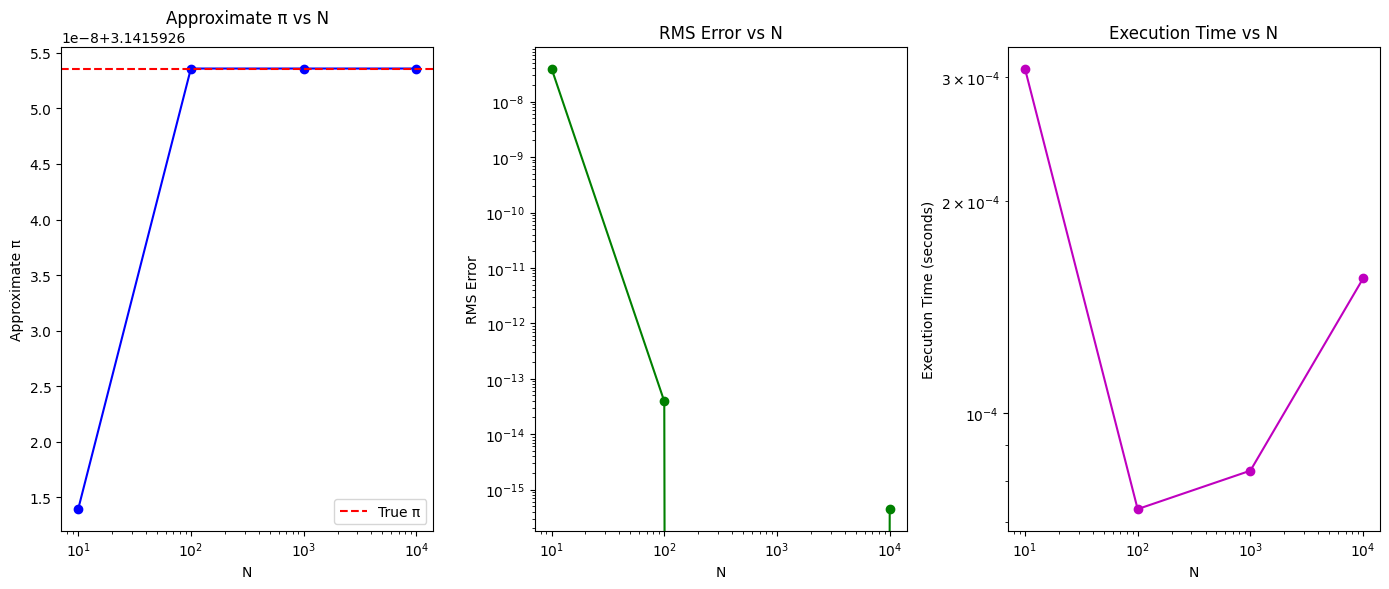

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Fungsi untuk dihitung integralnya
def f(x):
    return 4 / (1 + x**2)

# Implementasi metode Simpson 1/3
def simpson_13(f, a, b, N):
    if N % 2 == 1:
        N += 1  # N harus genap untuk metode Simpson 1/3
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    fx = f(x)
    integral = fx[0] + fx[-1] + 4 * np.sum(fx[1:-1:2]) + 2 * np.sum(fx[2:-2:2])
    integral *= h / 3
    return integral

# Fungsi untuk menghitung galat RMS
def rms_error(approx_value, true_value):
    return np.sqrt(np.mean((approx_value - true_value) ** 2))

# Nilai referensi untuk pi
true_pi = 3.14159265358979323846

# Variasi nilai N
N_values = [10, 100, 1000, 10000]

# Uji kode dan ukur waktu eksekusi serta galat RMS
results = []
for N in N_values:
    start_time = time.time()
    approx_pi = simpson_13(f, 0, 1, N)
    end_time = time.time()
    elapsed_time = end_time - start_time
    error = rms_error(approx_pi, true_pi)
    results.append((N, approx_pi, error, elapsed_time))

# Tampilkan hasil
for N, approx_pi, error, elapsed_time in results:
    print(f'N = {N}:')
    print(f'  Approximate pi = {approx_pi}')
    print(f'  RMS Error = {error}')
    print(f'  Execution Time = {elapsed_time} seconds\n')

# Extracting data for plotting
N_values = [result[0] for result in results]
approx_pis = [result[1] for result in results]
errors = [result[2] for result in results]
times = [result[3] for result in results]

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Approximate Pi
plt.subplot(1, 3, 1)
plt.plot(N_values, approx_pis, marker='o', linestyle='-', color='b')
plt.axhline(y=true_pi, color='r', linestyle='--', label='True π')
plt.xlabel('N')
plt.ylabel('Approximate π')
plt.title('Approximate π vs N')
plt.xscale('log')
plt.legend()

# Plot RMS Error
plt.subplot(1, 3, 2)
plt.plot(N_values, errors, marker='o', linestyle='-', color='g')
plt.xlabel('N')
plt.ylabel('RMS Error')
plt.title('RMS Error vs N')
plt.xscale('log')
plt.yscale('log')

# Plot Execution Time
plt.subplot(1, 3, 3)
plt.plot(N_values, times, marker='o', linestyle='-', color='m')
plt.xlabel('N')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs N')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()
